# **Assignment 1**

# Srujana Vanka - 2020102005

In [ ]:
# Importing librabies
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline
from google.colab.patches import cv2_imshow 
import math
import time 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/images/
%ls

# Question 6

## Part 1

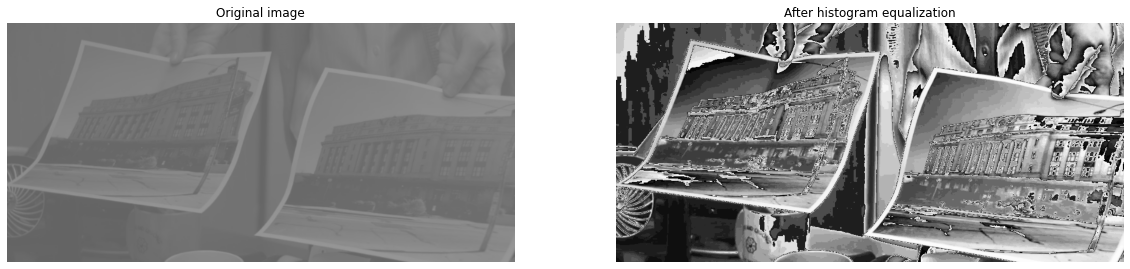

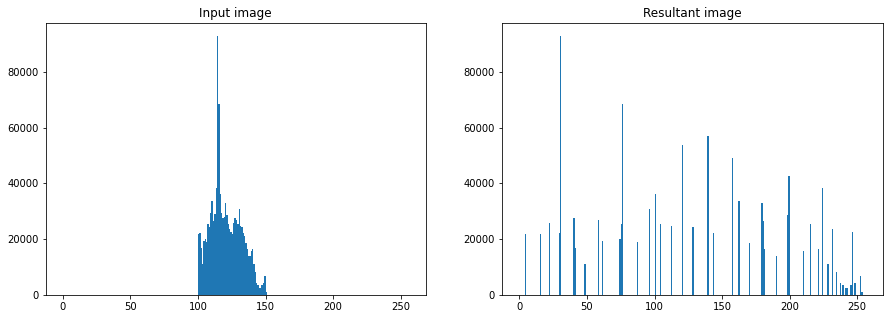

In [ ]:
def HistEqualization(im):
  cdf=np.zeros(256,dtype=int)
  for i in range(256):
    cdf[i]= ((im<=i).sum())
  cdf=cdf*1.0/(im.shape[0]*im.shape[1]*1.0) 
  im=im.astype(np.uint8) 
  im=im.copy()
  im = np.round(255.0 * cdf[im]) #scale back upto 255
  im=np.round(im)
  im=im.astype(np.uint8)
  return im

pic = cv2.imread("Same_picture.png")
histpic = HistEqualization(pic)

plt.figure(figsize = (20,16))
plt.subplot(121)
plt.imshow(pic,'gray')
plt.axis('off')
plt.title("Original image")
plt.subplot(122)
plt.imshow(histpic,'gray')
plt.axis('off')
plt.title("After histogram equalization")
plt.show()

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.hist(pic.ravel(),256,[0,256]) 
plt.title("Input image")
plt.subplot(122)
plt.hist(histpic.ravel(),256,[0,256]) 
plt.title("Resultant image")
plt.show()

Histogram equalization is a method in image processing of contrast adjustment using the image's histogram.

From above, we can see that the resultant histogram is more distributed as compared to the inital histogram. There are also more peaks in the output as compared to the input.


## Part 2 - a

In [ ]:
def HistMatching(im1,im2):
  cdfsrc=np.zeros(256,dtype=int)
  cdfref=np.zeros(256,dtype=int)
  for i in range(256):
    cdfsrc[i]= ((im1<=i).sum())
    cdfref[i]= ((im2<=i).sum())

  # CDF:
  cdfsrc=cdfsrc*1.0/(im1.shape[0]*im1.shape[1]*1.0)
  cdfref=cdfref*1.0/(im2.shape[0]*im2.shape[1]*1.0)
  cdfsrc=np.floor(255*cdfsrc)
  cdfref=np.floor(255*cdfref)
  lookup=np.zeros(256)

  for i in range(256):
    # Distance between the two cdfs
    nearest=np.abs(cdfref-cdfsrc[i]) 

    # Indexes where distance is minimum
    j=np.where(nearest == nearest.min()) 
    j=np.asarray(j) 

    # Nearest intensity to original minimum intensity
    asdf=np.abs(j-i) 
    finalindex=asdf.argmin() 
    lookup[i]=j[0][finalindex] 
  
  # Lookup operation
  matched=cv2.LUT(im1,lookup) 
  return matched

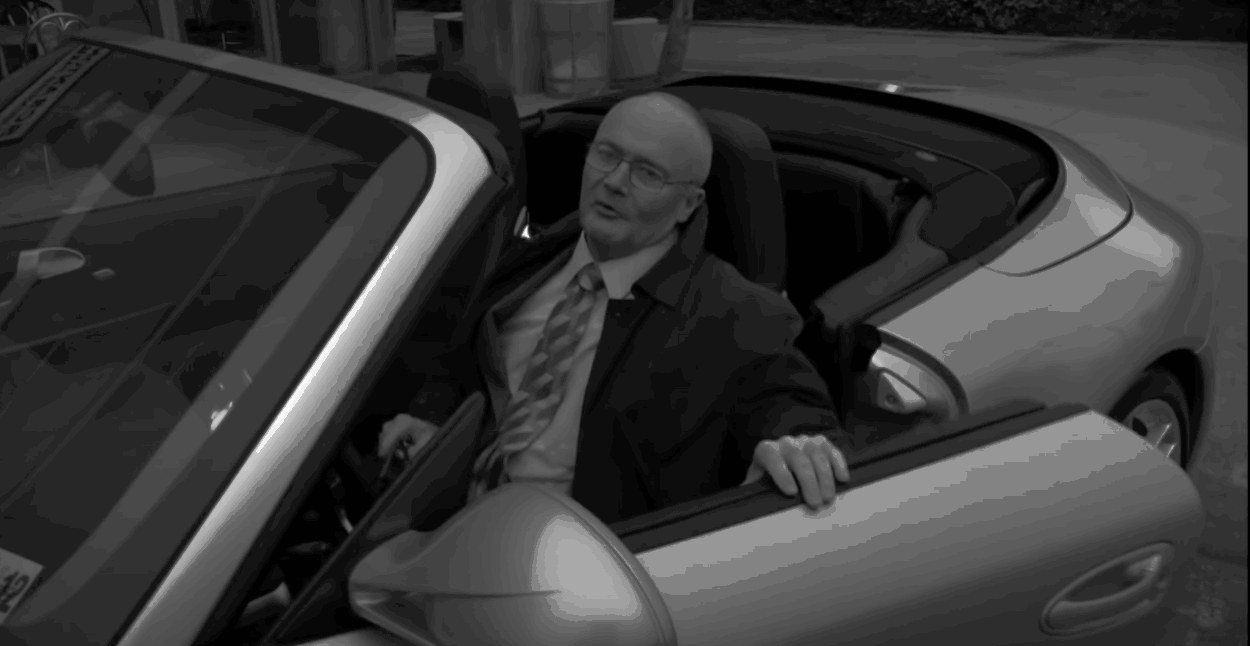

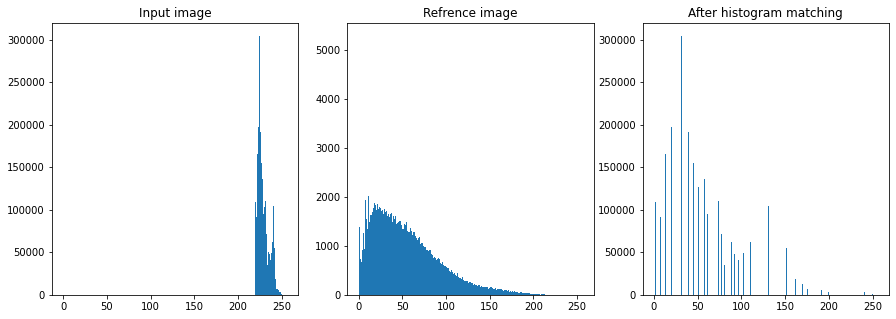

In [ ]:
creed = cv2.imread("Creed.png")
texture = cv2.imread("Texture.jpg")
output = HistMatching(creed,texture)

cv2_imshow(output)

plt.figure(figsize = (15,5))
plt.subplot(131)
plt.hist(creed.ravel(),256,[0,256]) 
plt.title("Input image")
plt.subplot(132)
plt.hist(texture.ravel(),256,[0,256]) 
plt.title("Refrence image")
plt.subplot(133)
plt.hist(output.ravel(),256,[0,256]) 
plt.title("After histogram matching")
plt.show()

### Part 2 - b

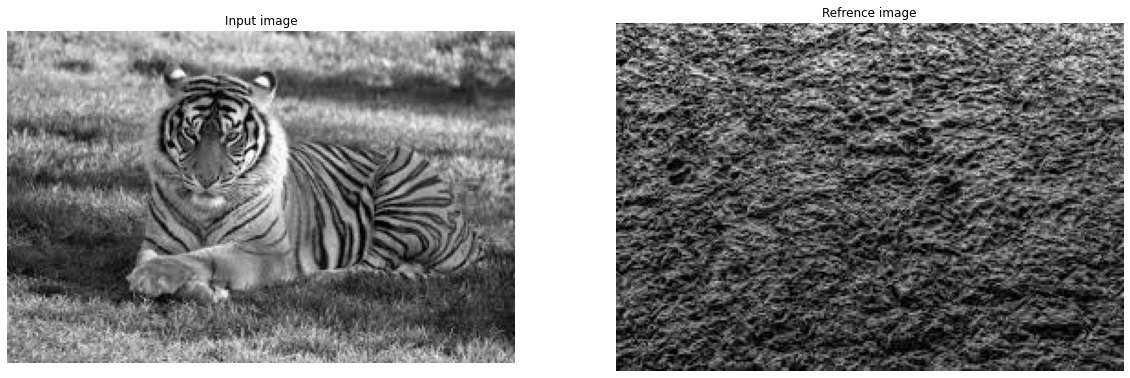

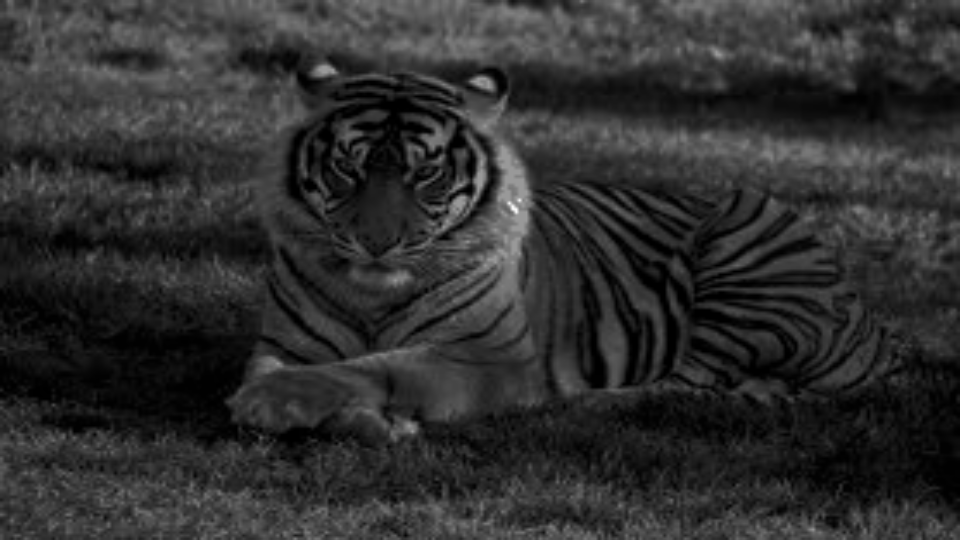

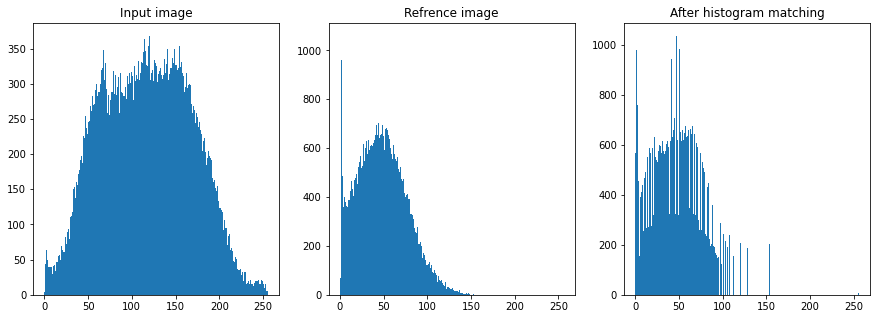

In [ ]:
creed2 = cv2.imread("images.jpeg")
texture2 = cv2.imread("texture2.jpeg")
creed2 = cv2.cvtColor(creed2, cv2.COLOR_BGR2GRAY)
texture2 = cv2.cvtColor(texture2, cv2.COLOR_BGR2GRAY)
output = HistMatching(creed2,texture2)

plt.figure(figsize = (20,16))
plt.subplot(121)
plt.imshow(creed2,'gray')
plt.axis('off')
plt.title("Input image")
plt.subplot(122)
plt.imshow(texture2,'gray')
plt.axis('off')
plt.title("Refrence image")
plt.show()
outputS =  cv2.resize(output, (960, 540)) 
cv2_imshow(outputS)


plt.figure(figsize = (15,5))
plt.subplot(131)
plt.hist(creed2.ravel(),256,[0,256]) 
plt.title("Input image")
plt.subplot(132)
plt.hist(texture2.ravel(),256,[0,256]) 
plt.title("Refrence image")
plt.subplot(133)
plt.hist(output.ravel(),256,[0,256]) 
plt.title("After histogram matching")
plt.show()

### Since the chosen refrence image as darker intensities, the resultant image is also dark toned.